<a href="https://colab.research.google.com/github/jyothisasidharan/CNN-RNN/blob/main/CNN%2BRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Google Colab Project : CNNs + RNNs (Python, TensorFlow/Keras)

In [24]:
# Setup
!pip install tensorflow matplotlib
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models


In [27]:
# Load MNSIT
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize and reshape
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

print("Training samples:", x_train.shape)


Training samples: (60000, 28, 28, 1)


In [28]:
# Build CNN Model
cnn = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

cnn.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Train CNN
history_cnn = cnn.fit(x_train, y_train, epochs=5,
                      validation_split=0.2, batch_size=64)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8725 - loss: 0.4162 - val_accuracy: 0.9812 - val_loss: 0.0650
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9818 - loss: 0.0603 - val_accuracy: 0.9854 - val_loss: 0.0504
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9882 - loss: 0.0367 - val_accuracy: 0.9869 - val_loss: 0.0446
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9914 - loss: 0.0288 - val_accuracy: 0.9877 - val_loss: 0.0404
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9928 - loss: 0.0214 - val_accuracy: 0.9893 - val_loss: 0.0396


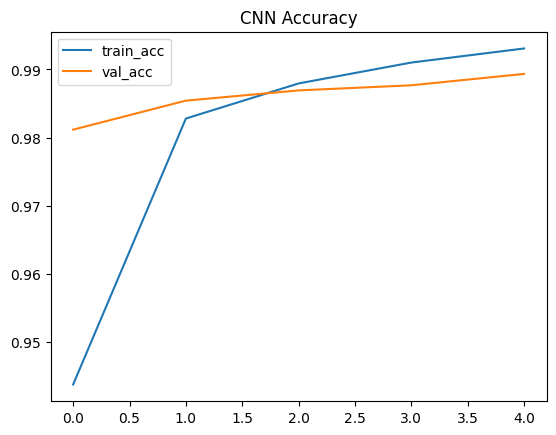

In [30]:
# Plot training curves
plt.plot(history_cnn.history['accuracy'], label="train_acc")
plt.plot(history_cnn.history['val_accuracy'], label="val_acc")
plt.title("CNN Accuracy")
plt.legend()
plt.show()


In [31]:
#Evaluate CNN
test_loss, test_acc = cnn.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9889 - loss: 0.0343
Test Accuracy: 0.9912999868392944


In [32]:
# Load IMDB Dataset
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
max_len = 200

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

print("Train shape:", x_train.shape)


Train shape: (25000, 200)


In [33]:
# Build RNN(LSTM) Model
rnn = models.Sequential([
    layers.Embedding(vocab_size, 128, input_length=max_len),
    layers.LSTM(128),
    layers.Dense(1, activation="sigmoid")
])

rnn.compile(optimizer="adam",
            loss="binary_crossentropy",
            metrics=["accuracy"])

rnn.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [34]:
# Train the RNN
history_rnn = rnn.fit(x_train, y_train,
                      epochs=3,
                      batch_size=64,
                      validation_split=0.2)


Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.7049 - loss: 0.5393 - val_accuracy: 0.8494 - val_loss: 0.3527
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8969 - loss: 0.2634 - val_accuracy: 0.8386 - val_loss: 0.3635
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9367 - loss: 0.1823 - val_accuracy: 0.8698 - val_loss: 0.3401


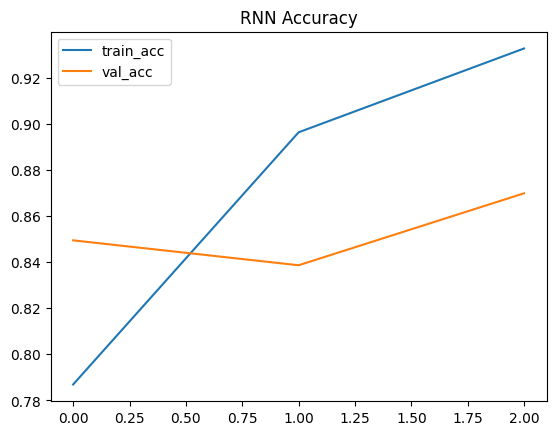

In [35]:
# Plot RNN Accuracy
plt.plot(history_rnn.history['accuracy'], label="train_acc")
plt.plot(history_rnn.history['val_accuracy'], label="val_acc")
plt.title("RNN Accuracy")
plt.legend()
plt.show()


In [36]:
#Evaluate RNN
loss, acc = rnn.evaluate(x_test, y_test)
print("RNN Test Accuracy:", acc)


782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8657 - loss: 0.3479
RNN Test Accuracy: 0.8660399913787842




This Colab notebook demonstrates:

✅ CNN for image classification

Convolution → Pooling → Dense

MNIST dataset

Accuracy plotting

Model evaluation

✅ RNN (LSTM) for text sentiment analysis

Tokenization + Padding

Embedding → LSTM

IMDB movie reviews sentiment

In [37]:
# 🧠 Part 3 — Bidirectional LSTM Model
# Build Bidirectional LSTM
from tensorflow.keras.layers import Bidirectional

bi_lstm = models.Sequential([
    layers.Embedding(vocab_size, 128, input_length=max_len),
    Bidirectional(layers.LSTM(128, return_sequences=False)),
    layers.Dense(1, activation="sigmoid")
])

bi_lstm.compile(optimizer="adam",
                loss="binary_crossentropy",
                metrics=["accuracy"])

bi_lstm.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [38]:
# Train Bidirectional LSTM
history_bi = bi_lstm.fit(
    x_train, y_train,
    epochs=3,
    batch_size=64,
    validation_split=0.2
)


Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.6957 - loss: 0.5531 - val_accuracy: 0.8556 - val_loss: 0.3456
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9031 - loss: 0.2540 - val_accuracy: 0.8668 - val_loss: 0.3162
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9341 - loss: 0.1827 - val_accuracy: 0.8742 - val_loss: 0.3520


In [39]:
# Evaluate Bidirectional LSTM
loss, acc = bi_lstm.evaluate(x_test, y_test)
print("Bidirectional LSTM Test Accuracy:", acc)



782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8590 - loss: 0.3893
Bidirectional LSTM Test Accuracy: 0.860040009021759


In [40]:
# Build CNN–LSTM Model
cnn_lstm = models.Sequential([
    layers.Embedding(vocab_size, 128, input_length=max_len),
    layers.Conv1D(64, 5, activation='relu'),
    layers.MaxPooling1D(2),
    layers.LSTM(128),
    layers.Dense(1, activation='sigmoid')
])

cnn_lstm.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

cnn_lstm.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [41]:
# Train CNN-LSTM
history_cnn_lstm = cnn_lstm.fit(
    x_train, y_train,
    epochs=3,
    batch_size=64,
    validation_split=0.2
)


Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6783 - loss: 0.5637 - val_accuracy: 0.8746 - val_loss: 0.2960
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9133 - loss: 0.2250 - val_accuracy: 0.8850 - val_loss: 0.2790
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9572 - loss: 0.1310 - val_accuracy: 0.8832 - val_loss: 0.3418


In [42]:
# Evaluate CNN-LSTM
loss, acc = cnn_lstm.evaluate(x_test, y_test)
print("CNN–LSTM Test Accuracy:", acc)


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8696 - loss: 0.3739
CNN–LSTM Test Accuracy: 0.8697199821472168


In [43]:
# Hyperparameter Tuning (Keras Tuner)
!pip install keras-tuner
import keras_tuner as kt


In [44]:
# Build Model for tuning
def build_model(hp):
    model = models.Sequential()
    model.add(layers.Embedding(vocab_size, 128, input_length=max_len))

    # Tune LSTM units
    hp_units = hp.Int('units', min_value=64, max_value=256, step=64)
    model.add(layers.LSTM(hp_units))

    # Tune dropout
    hp_dropout = hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)
    model.add(layers.Dropout(hp_dropout))

    model.add(layers.Dense(1, activation='sigmoid'))

    # Tune learning rate
    hp_lr = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp_lr),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model


In [45]:
# Run Hyperparameter Search
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='tuner_dir',
    project_name='imdb_tuner'
)

tuner.search(x_train, y_train, epochs=3, validation_split=0.2)


Reloading Tuner from tuner_dir/imdb_tuner/tuner0.json


In [46]:
# Get Best Model
best_model = tuner.get_best_models(1)[0]
best_model.summary()

loss, acc = best_model.evaluate(x_test, y_test)
print("Best Tuned Model Accuracy:", acc)



/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (32, 200, 128)         │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (32, 192)              │       246,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (32, 192)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 1)                │           193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,526,721 (5.82 MB)

 Trainable params: 1,526,721 (5.82 MB)

 Non-trainable params: 0 (0.00 B)

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8646 - loss: 0.3397
Best Tuned Model Accuracy: 0.8678799867630005


In [47]:
# Collect Model metrics
results = {
    "Model": ["Simple LSTM", "Bidirectional LSTM", "CNN–LSTM", "Best Tuned Model"],
    "Test Accuracy": [
        history_rnn.history['val_accuracy'][-1],
        history_bi.history['val_accuracy'][-1],
        history_cnn_lstm.history['val_accuracy'][-1],
        acc
    ],
    "Parameters": [
        rnn.count_params(),
        bi_lstm.count_params(),
        cnn_lstm.count_params(),
        best_model.count_params()
    ]
}

import pandas as pd
results_df = pd.DataFrame(results)
results_df


,Model,Test Accuracy,Parameters
0,Simple LSTM,0.86980,1411713
1,Bidirectional LSTM,0.87420,1543425
2,CNN–LSTM,0.88320,1419969
3,Best Tuned Model,0.86788,1526721


In [48]:
# Display comparison tables
from tabulate import tabulate

print(tabulate(results_df, headers='keys', tablefmt='github'))


|    | Model              |   Test Accuracy |   Parameters |
|----|--------------------|-----------------|--------------|
|  0 | Simple LSTM        |         0.8698  |      1411713 |
|  1 | Bidirectional LSTM |         0.8742  |      1543425 |
|  2 | CNN–LSTM           |         0.8832  |      1419969 |
|  3 | Best Tuned Model   |         0.86788 |      1526721 |
